
# Introduction #

Machine Learning: Deep Learning Final Project
Computer Vision - Categorizing Pictures of Flowers

This project will utilize a Kaggle competition data set to analyze pictures of flowers and attempt to categorize them using computer vision and neural network techniques. Through exploratory data analysis we will get a sense of what the images in the data set look like, and what the expected categorizations might look like proportionally (based on the ground-truth labeling). The creation of effective data pipelines will be a focus of data preprocessing to decrease the amount of time model training will take, and we will also batch the data ahead of creating a model. This model will utilize a custom learning rate function, and other hyperparameter tuning can be utilized to ensure convergence to a minimal loss per epoch.

The motivation from the project comes from my having a little bit of trouble moving through the steps of Week 3’s competition assignment for this course. I wanted to learn more about image data preprocessing and initialization and tuning of computer vision models.

In [1]:
import math, re, os
import numpy as np
import tensorflow as tf

print("Tensorflow version " + tf.__version__)

D0608 14:50:57.897197174      13 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D0608 14:50:57.897227890      13 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D0608 14:50:57.897231899      13 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D0608 14:50:57.897234478      13 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D0608 14:50:57.897237013      13 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (default:ON)
D0608 14:50:57.897239507      13 config.cc:196]                        gRPC EXPERIMENT client_privacy                         ON  (default:ON)
D0608 14:50:57.897241983      13 config.cc:196]                        gRPC EXPERIMENT dapper_request_wire_size               OFF (default:O

Tensorflow version 2.16.1


In [2]:
# Detect hardware, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection. No parameters necessary if TPU_NAME environment variable is set. On Kaggle this is always the case.
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() # default distribution strategy in Tensorflow. Works on CPU and single GPU.

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


I0000 00:00:1717858271.123024      13 service.cc:145] XLA service 0x5a656da8d650 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1717858271.123084      13 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1717858271.123089      13 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1717858271.123091      13 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1717858271.123094      13 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1717858271.123097      13 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1717858271.123100      13 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1717858271.123102      13 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1717858271.123105      13 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


REPLICAS:  8


The code above sets up our environment and checks for the TPU accelerator.

# Data #

This data is provided as a part of the Petals to the Metal competition on Kaggle.

The data is sourced from five different public datasets, and contains pictures for 104 different classifications of flowers. Some flower classes are narrower than others, and some categorizations are subsets of other categorizations.

The data consisted of 7382 unique images. Each row has a unique ID that represents a distinct image file.

We will be training our Keras image classifier on a Tensor Processing Unit (TPU). When used with TPUs, datasets need to be stored in a Google Cloud Storage Bucket. The code below displays the path to the data that we will utilize.

In [3]:
from kaggle_datasets import KaggleDatasets

GCS_DS_PATH = KaggleDatasets().get_gcs_path('tpu-getting-started')
print(GCS_DS_PATH) # what do gcs paths look like?

/kaggle/input/tpu-getting-started


get_gcs_path is not required on TPU VMs which can directly use Kaggle datasets, using path: /kaggle/input/tpu-getting-started


When used with TPUs, datasets need to be stored in a [Google Cloud Storage bucket](https://cloud.google.com/storage/). The above will retrieve the GCS path for this competition's dataset.

# Setting Up Data Pipelines, Data Processing, Exploratory Data Analysis #

In working through training the Week 3 Assignment CNN Model, I noticed that training time per epoch was extremely long. Creating a streamlined data pipeline can improve training time and cost, so prior to data exploration we can set up a useful data pipeline using the tensorflow.data module.

**Load Data**

First, we need to do some data preprocessing. When used with TPUs, datasets are made into TFRecords. This is a format convenient for distributing data to each of the TPUs cores.

The newly processed datasets are tf.data.Dataset objects, like a stream of data records. The training and validation sets are streams of (image, label) pairs.

In [4]:

IMAGE_SIZE = [512, 512]
GCS_PATH = GCS_DS_PATH + '/tfrecords-jpeg-512x512'
AUTO = tf.data.experimental.AUTOTUNE

TRAINING_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/train/*.tfrec')
VALIDATION_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/val/*.tfrec')
TEST_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/test/*.tfrec') 

CLASSES = ['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',         # 00 - 09
           'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', # 10 - 19
           'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         # 20 - 29
           'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           # 30 - 39
           'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      # 40 - 49
           'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    # 50 - 59
           'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            # 60 - 69
           'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             # 70 - 79
           'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            # 80 - 89
           'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        # 90 - 99
           'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose']                                                                                                                                               # 100 - 102


def decode_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.reshape(image, [*IMAGE_SIZE, 3]) # explicit size needed for TPU
    return image

def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "class": tf.io.FixedLenFeature([], tf.int64),  # shape [] means single element
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    label = tf.cast(example['class'], tf.int32)
    return image, label # returns a dataset of (image, label) pairs

def read_unlabeled_tfrecord(example):
    UNLABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "id": tf.io.FixedLenFeature([], tf.string),  # shape [] means single element
        # class is missing, this competitions's challenge is to predict flower classes for the test dataset
    }
    example = tf.io.parse_single_example(example, UNLABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    idnum = example['id']
    return image, idnum # returns a dataset of image(s)

def load_dataset(filenames, labeled=True, ordered=False):
    # Read from TFRecords. For optimal performance, reading from multiple files at once and
    # disregarding data order. Order does not matter since we will be shuffling the data anyway.

    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False # disable order, increase speed

    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO) # automatically interleaves reads from multiple files
    dataset = dataset.with_options(ignore_order) # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_labeled_tfrecord if labeled else read_unlabeled_tfrecord, num_parallel_calls=AUTO)
    # returns a dataset of (image, label) pairs if labeled=True or (image, id) pairs if labeled=False
    return dataset

**Create Data Pipelines**

We'll use the `tf.data` API to define an efficient data pipeline for each dataset.

In [5]:

def data_augment(image, label):
    # Thanks to the dataset.prefetch(AUTO)
    # statement in the next function (below), this happens essentially
    # for free on TPU. Data pipeline code is executed on the "CPU"
    # part of the TPU while the TPU itself is computing gradients.
    image = tf.image.random_flip_left_right(image)
    #image = tf.image.random_saturation(image, 0, 2)
    return image, label   

def get_training_dataset():
    dataset = load_dataset(TRAINING_FILENAMES, labeled=True)
    dataset = dataset.map(data_augment, num_parallel_calls=AUTO)
    dataset = dataset.repeat() # the training dataset must repeat for several epochs
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset

def get_validation_dataset(ordered=False):
    dataset = load_dataset(VALIDATION_FILENAMES, labeled=True, ordered=ordered)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.cache()
    dataset = dataset.prefetch(AUTO)
    return dataset

def get_test_dataset(ordered=False):
    dataset = load_dataset(TEST_FILENAMES, labeled=False, ordered=ordered)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO)
    return dataset

def count_data_items(filenames):
    # the number of data items is written in the name of the .tfrec
    # files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

NUM_TRAINING_IMAGES = count_data_items(TRAINING_FILENAMES)
NUM_VALIDATION_IMAGES = count_data_items(VALIDATION_FILENAMES)
NUM_TEST_IMAGES = count_data_items(TEST_FILENAMES)
print('Dataset: {} training images, {} validation images, {} unlabeled test images'.format(NUM_TRAINING_IMAGES, NUM_VALIDATION_IMAGES, NUM_TEST_IMAGES))


Dataset: 12753 training images, 3712 validation images, 7382 unlabeled test images


**Taking a look at the shape of the datasets**

We will want to make sure that the batch sizes are correct for the number of TPUs that are working, and notice that the datasets are in (image, label) pairs.

In [6]:
# Define the batch size. This will be 16 with TPU off and 128 (=16*8) with TPU on
BATCH_SIZE = 16 * strategy.num_replicas_in_sync

ds_train = get_training_dataset()
ds_valid = get_validation_dataset()
ds_test = get_test_dataset()

print("Training:", ds_train)
print ("Validation:", ds_valid)
print("Test:", ds_test)

Training: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Test: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>


In [7]:
np.set_printoptions(threshold=15, linewidth=80)

print("Training data shapes:")
for image, label in ds_train.take(3):
    print(image.numpy().shape, label.numpy().shape)
print("Training data label examples:", label.numpy())

Training data shapes:
(128, 512, 512, 3) (128,)
(128, 512, 512, 3) (128,)
(128, 512, 512, 3) (128,)
Training data label examples: [73 73 68 ... 95 61 52]


In [8]:
print("Test data shapes:")
for image, idnum in ds_test.take(3):
    print(image.numpy().shape, idnum.numpy().shape)
print("Test data IDs:", idnum.numpy().astype('U')) # U=unicode string

Test data shapes:
(128, 512, 512, 3) (128,)
(128, 512, 512, 3) (128,)
(128, 512, 512, 3) (128,)
Test data IDs: ['cc9cd7803' 'cbb2dd81a' '9f6708c0b' ... '4c1b8a5c3' '46ccb6bd3' '78f6357bc']


**Exploratory Data Analysis**

Let's look at some of the images in the dataset. First we will define some helper functions to easily visualize the image, label pairs.

In [9]:

from matplotlib import pyplot as plt

def batch_to_numpy_images_and_labels(data):
    images, labels = data
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    if numpy_labels.dtype == object: # binary string in this case,
                                     # these are image ID strings
        numpy_labels = [None for _ in enumerate(numpy_images)]
    # If no labels, only image IDs, return None for labels (this is
    # the case for test data)
    return numpy_images, numpy_labels

def title_from_label_and_target(label, correct_label):
    if correct_label is None:
        return CLASSES[label], True
    correct = (label == correct_label)
    return "{} [{}{}{}]".format(CLASSES[label], 'OK' if correct else 'NO', u"\u2192" if not correct else '',
                                CLASSES[correct_label] if not correct else ''), correct

def display_one_flower(image, title, subplot, red=False, titlesize=16):
    plt.subplot(*subplot)
    plt.axis('off')
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize) if not red else int(titlesize/1.2), color='red' if red else 'black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)
    
def display_batch_of_images(databatch, predictions=None):
    """This will work with:
    display_batch_of_images(images)
    display_batch_of_images(images, predictions)
    display_batch_of_images((images, labels))
    display_batch_of_images((images, labels), predictions)
    """
    # data
    images, labels = batch_to_numpy_images_and_labels(databatch)
    if labels is None:
        labels = [None for _ in enumerate(images)]
        
    # auto-squaring: this will drop data that does not fit into square
    # or square-ish rectangle
    rows = int(math.sqrt(len(images)))
    cols = len(images)//rows
        
    # size and spacing
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols,1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))
    
    # display
    for i, (image, label) in enumerate(zip(images[:rows*cols], labels[:rows*cols])):
        title = '' if label is None else CLASSES[label]
        correct = True
        if predictions is not None:
            title, correct = title_from_label_and_target(predictions[i], label)
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols)*40+3 # magic formula tested to work from 1x1 to 10x10 images
        subplot = display_one_flower(image, title, subplot, not correct, titlesize=dynamic_titlesize)
    
    #layout
    plt.tight_layout()
    if label is None and predictions is None:
        plt.subplots_adjust(wspace=0, hspace=0)
    else:
        plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()


def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

In [10]:
ds_iter = iter(ds_train.unbatch().batch(20))

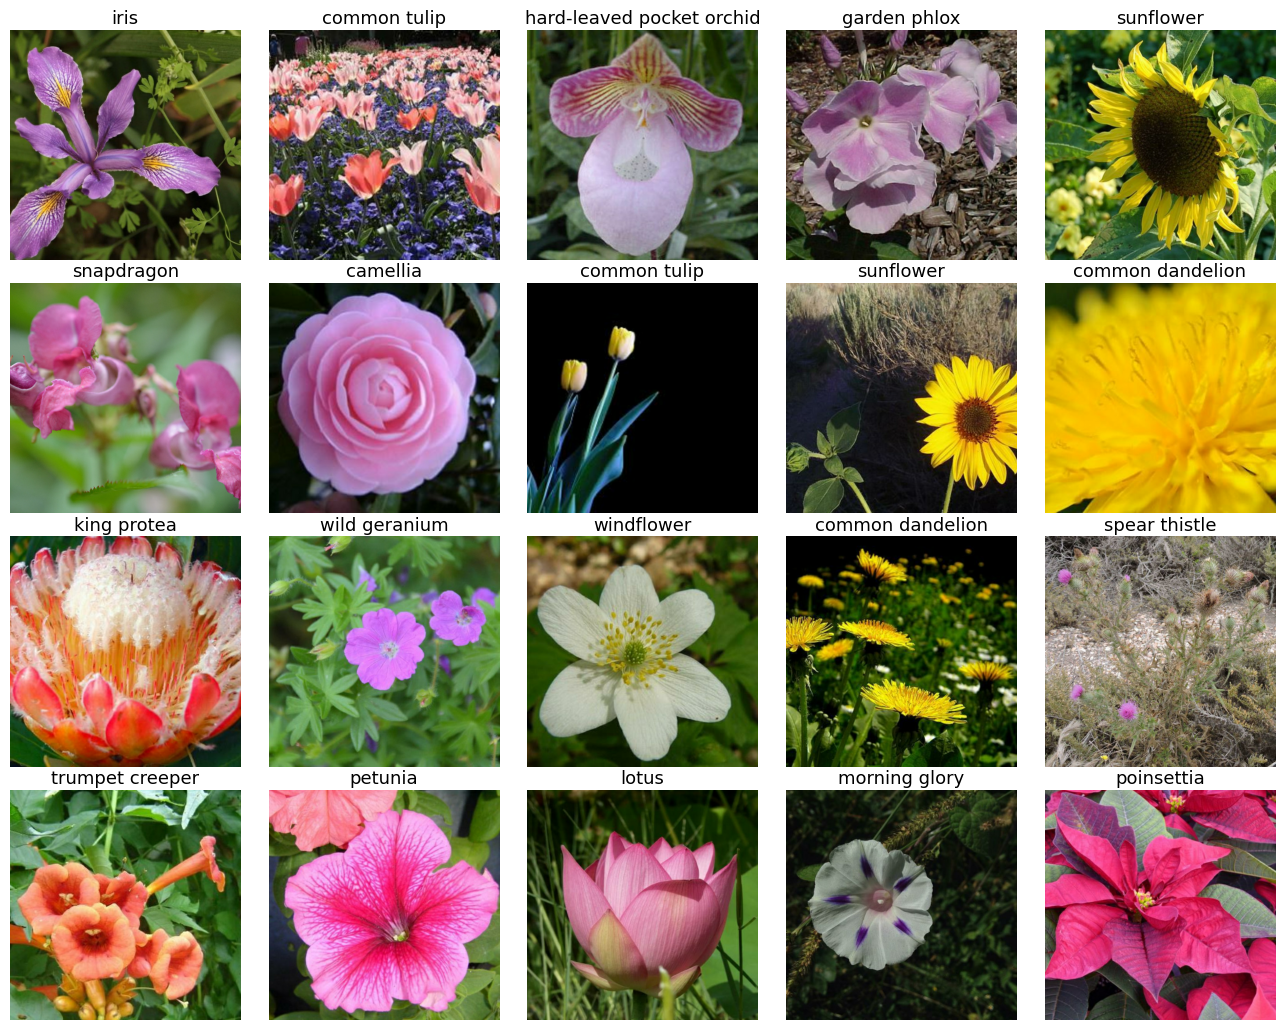

In [11]:
one_batch = next(ds_iter)
display_batch_of_images(one_batch)

# First Round of Modeling #

**Build the Model**

In our first model, we will utilize transfer learning, where we reuse part of a pretrained model to get a jump on training. In this case, we will use VGG16, which is a base model which is pretrained on ImageNet.

We need to define our model within a strategy.scope() context in order to utilize the data pipeline that we built earlier.

In [12]:
EPOCHS = 12

with strategy.scope():
    pretrained_model = tf.keras.applications.VGG16(
        weights='imagenet',
        include_top=False ,
        input_shape=[*IMAGE_SIZE, 3]
    )
    pretrained_model.trainable = False
    
    model = tf.keras.Sequential([
        # To a base pretrained on ImageNet to extract features from images...
        pretrained_model,
        # ... attach a new head to act as a classifier.
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(len(CLASSES), activation='softmax')
    ])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


We will also pre-define the metrics that we will be looking at later for model evaluation. In this case, we will use the sparce_categorical version of the loss metric, since we have a classification task with more than two labels

In [13]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'],
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

The last step for building the model will be designing a learning rate, which we have increasing until 5 epochs, and then exponentially decaying thereafter.

Learning rate schedule: 1e-05 to 5e-05 to 2.05e-05


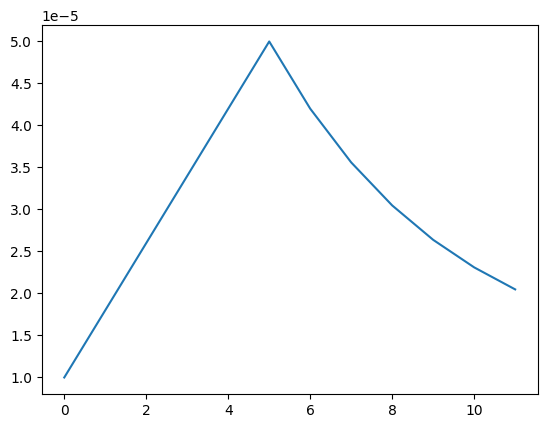

In [14]:

# Learning Rate Schedule for Fine Tuning #
def exponential_lr(epoch,
                   start_lr = 0.00001, min_lr = 0.00001, max_lr = 0.00005,
                   rampup_epochs = 5, sustain_epochs = 0,
                   exp_decay = 0.8):

    def lr(epoch, start_lr, min_lr, max_lr, rampup_epochs, sustain_epochs, exp_decay):
        # linear increase from start to rampup_epochs
        if epoch < rampup_epochs:
            lr = ((max_lr - start_lr) /
                  rampup_epochs * epoch + start_lr)
        # constant max_lr during sustain_epochs
        elif epoch < rampup_epochs + sustain_epochs:
            lr = max_lr
        # exponential decay towards min_lr
        else:
            lr = ((max_lr - min_lr) *
                  exp_decay**(epoch - rampup_epochs - sustain_epochs) +
                  min_lr)
        return lr
    return lr(epoch,
              start_lr,
              min_lr,
              max_lr,
              rampup_epochs,
              sustain_epochs,
              exp_decay)

lr_callback = tf.keras.callbacks.LearningRateScheduler(exponential_lr, verbose=True)

rng = [i for i in range(EPOCHS)]
y = [exponential_lr(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

**Model Training**

As an interesting point in model training, we can see the effect of using our data pipeline. In this output, see the time/step when we are fully implementing the TPU data pipeline that we constructed.

Below we will restate the definition for the model so that everything is under one call of strategy.scope()

In [15]:
## use scope
with strategy.scope():
    ## set model
    pretrained_model = tf.keras.applications.VGG16(
        weights='imagenet',
        include_top=False ,
        input_shape=[*IMAGE_SIZE, 3]
    )
    pretrained_model.trainable = False

    model = tf.keras.Sequential([
        # To a base pretrained on ImageNet to extract features from images...
        pretrained_model,
        # ... attach a new head to act as a classifier.
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(len(CLASSES), activation='softmax')
    ])

    ## compile model
    model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
    )

    STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE

    ## train model
    history = model.fit(
        ds_train,
        validation_data=ds_valid,
        epochs=EPOCHS,
        steps_per_epoch=STEPS_PER_EPOCH,
        callbacks=[lr_callback]
    )

I0000 00:00:1717858286.607972      13 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/12


2024-06-08 14:51:29.868253: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1717858292.448909     806 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(5014087334aea608:0:0), session_name()


 1/99 ━━━━━━━━━━━━━━━━━━━━ 19:01 12s/step - loss: 4.8107 - sparse_categorical_accuracy: 0.0078

I0000 00:00:1717858298.611738     806 tpu_compile_op_common.cc:245] Compilation of 5014087334aea608:0:0 with session name  took 6.162781066s and succeeded
I0000 00:00:1717858298.617715     806 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(5014087334aea608:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_2851115271921536310", property.function_library_fingerprint = 7424686920167730590, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "16,512,512,3,;16,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1717858298.617755     806 tpu_compilation_cache_interface.cc:541] After adding entry for key 50

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - loss: 4.4358 - sparse_categorical_accuracy: 0.0454

I0000 00:00:1717858346.236394     793 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(b3c35c6493d29f9f:0:0), session_name()
I0000 00:00:1717858352.337525     793 tpu_compile_op_common.cc:245] Compilation of b3c35c6493d29f9f:0:0 with session name  took 6.09135498s and succeeded
I0000 00:00:1717858352.341220     793 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(b3c35c6493d29f9f:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_10388656982472404188", property.function_library_fingerprint = 11328912854917533192, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "16,512,512,3,;16,;", property.guaranteed_constants_size = 0, embed

99/99 ━━━━━━━━━━━━━━━━━━━━ 76s 658ms/step - loss: 4.4341 - sparse_categorical_accuracy: 0.0456 - val_loss: 4.0029 - val_sparse_categorical_accuracy: 0.1444 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0008100000379979611.
Epoch 2/12


/usr/local/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


99/99 ━━━━━━━━━━━━━━━━━━━━ 58s 589ms/step - loss: 4.0389 - sparse_categorical_accuracy: 0.1093 - val_loss: 3.8688 - val_sparse_categorical_accuracy: 0.1466 - learning_rate: 8.1000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0005060000335611404.
Epoch 3/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 59s 595ms/step - loss: 3.9379 - sparse_categorical_accuracy: 0.1351 - val_loss: 3.8023 - val_sparse_categorical_accuracy: 0.1466 - learning_rate: 5.0600e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00023240000449121004.
Epoch 4/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 58s 590ms/step - loss: 3.8896 - sparse_categorical_accuracy: 0.1407 - val_loss: 3.7638 - val_sparse_categorical_accuracy: 0.1703 - learning_rate: 2.3240e-04

Epoch 5: LearningRateScheduler setting learning rate to 8.648000176530332e-05.
Epoch 5/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 59s 596ms/step - loss: 3.8312 - sparse_categorical_accuracy: 0.1631 - val_loss: 3.7496 - val_sparse_categorical_accuracy: 0.1918 - learning_rate: 8

**Evaluation**

To evaluate this initial model, we want to look at loss and accuracy per epoch.

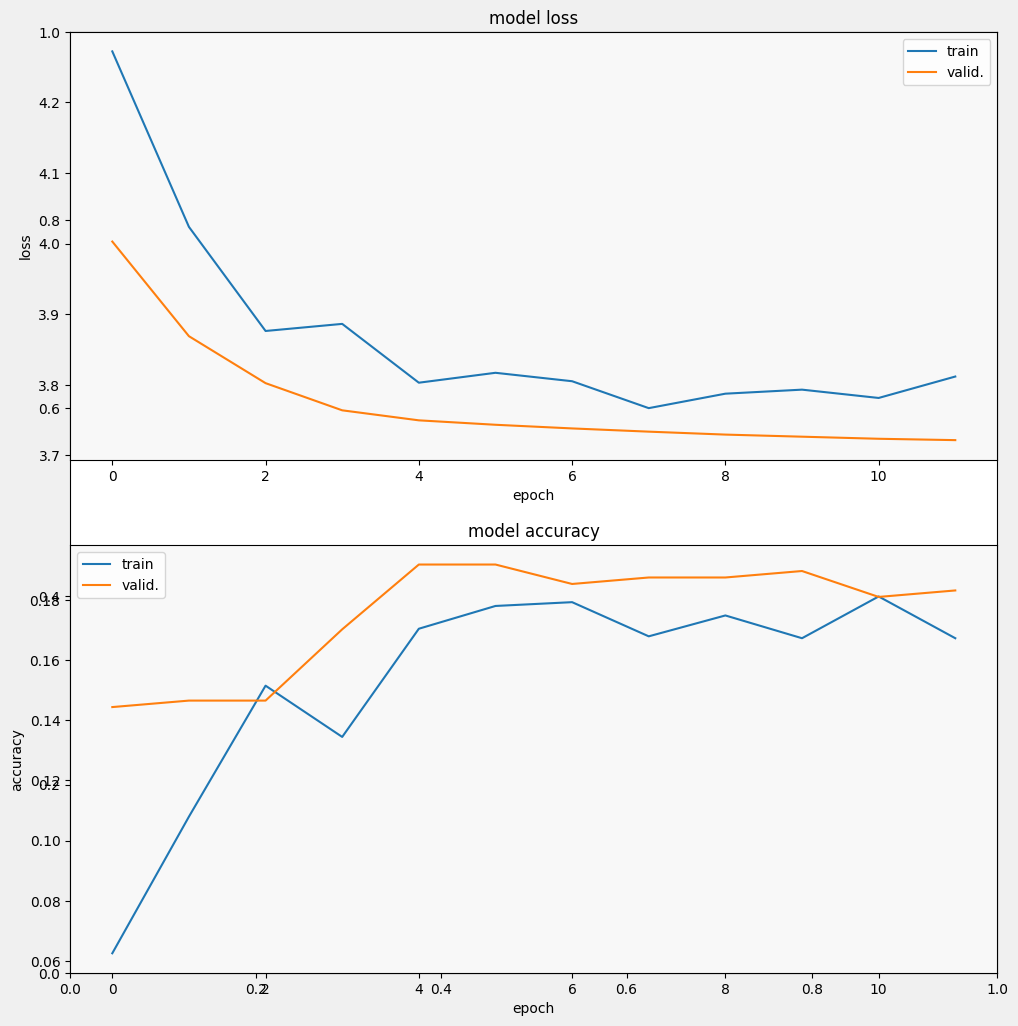

In [16]:
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss',
    211,
)
display_training_curves(
    history.history['sparse_categorical_accuracy'],
    history.history['val_sparse_categorical_accuracy'],
    'accuracy',
    212,
)

We like to see the decreasing loss per epoch, this tells us that our model is decreasing. But looking at the model’s accuracy over time, we notice that the validation set accuracy begins to diverge from the training set accuracy in the later epochs, which might make us think that this model is overfitted. To work on this issue we might try a new type of model and work with the hyperparameters to get better results.

# Second Round of Modeling, Hyperparameter Tuning

**Building and Training the Model**

For our second model, we might want to try a different pretrained model. Here, we’ll use Xception, which is a model that is included with Keras.

We want to change a couple of the hyperparameters as well to hopefully see more accuracy in the validation training set. We can change the activation function in the model to ReLU, which should lend itself to faster convergence and add more generalization into the model to hopefully avoid overfitting.

We will continue using Adam as the optimizer and utilizing the custom learning rate function.


In [26]:
## use scope
with strategy.scope():
    ## set model
    pretrained_model2 = tf.keras.applications.Xception(
        weights='imagenet',
        include_top=False ,
        input_shape=[*IMAGE_SIZE, 3]
    )
    pretrained_model.trainable = False

    model2 = tf.keras.Sequential([
        # To a base pretrained on ImageNet to extract features from images...
        pretrained_model2,
        # ... attach a new head to act as a classifier.
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(len(CLASSES), activation='softmax')
    ])

    ## compile model
    model2.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
    )

    STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE

    ## train model
    history2 = model2.fit(
        ds_train,
        validation_data=ds_valid,
        epochs=EPOCHS,
        steps_per_epoch=STEPS_PER_EPOCH,
        callbacks=[lr_callback]
    )


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/12


2024-06-08 15:24:10.640399: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1717860254.211675     818 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(bfbf25b65a34026e:0:0), session_name()
I0000 00:00:1717860273.200715     818 tpu_compile_op_common.cc:245] Compilation of bfbf25b65a34026e:0:0 with session name  took 18.988993715s and succeeded
I0000 00:00:1717860273.258892     818 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(bfbf25b65a34026e:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_12678358741871014617", property.function_library_fingerprint = 9436984693090330712, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z 

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - loss: 3.8613 - sparse_categorical_accuracy: 0.1990

2024-06-08 15:25:39.384804: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignVariableOp.
I0000 00:00:1717860340.143416     837 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(1f51ec087e5253a:0:0), session_name()
I0000 00:00:1717860347.163122     837 tpu_compile_op_common.cc:245] Compilation of 1f51ec087e5253a:0:0 with session name  took 7.01966429s and succeeded
I0000 00:00:1717860347.173096     837 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(1f51ec087e5253a:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_9089655601437246821", property.function_library_fingerprint = 1917025408992781317, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology

99/99 ━━━━━━━━━━━━━━━━━━━━ 163s 861ms/step - loss: 3.8566 - sparse_categorical_accuracy: 0.2000 - val_loss: 5.8796 - val_sparse_categorical_accuracy: 0.2435 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0008100000379979611.
Epoch 2/12


/usr/local/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


99/99 ━━━━━━━━━━━━━━━━━━━━ 76s 771ms/step - loss: 2.3852 - sparse_categorical_accuracy: 0.4535 - val_loss: 2.2429 - val_sparse_categorical_accuracy: 0.4440 - learning_rate: 8.1000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0005060000335611404.
Epoch 3/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 76s 771ms/step - loss: 1.6199 - sparse_categorical_accuracy: 0.6004 - val_loss: 1.2192 - val_sparse_categorical_accuracy: 0.6853 - learning_rate: 5.0600e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00023240000449121004.
Epoch 4/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 77s 778ms/step - loss: 1.1488 - sparse_categorical_accuracy: 0.7149 - val_loss: 0.7638 - val_sparse_categorical_accuracy: 0.8168 - learning_rate: 2.3240e-04

Epoch 5: LearningRateScheduler setting learning rate to 8.648000176530332e-05.
Epoch 5/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 77s 778ms/step - loss: 0.8549 - sparse_categorical_accuracy: 0.7822 - val_loss: 0.6068 - val_sparse_categorical_accuracy: 0.8642 - learning_rate: 8

**Evaluation**

After training the model utilizing the TPU accelerator and we can visualize the resulting loss and accuracy metrics for the model train dataset and validation set.

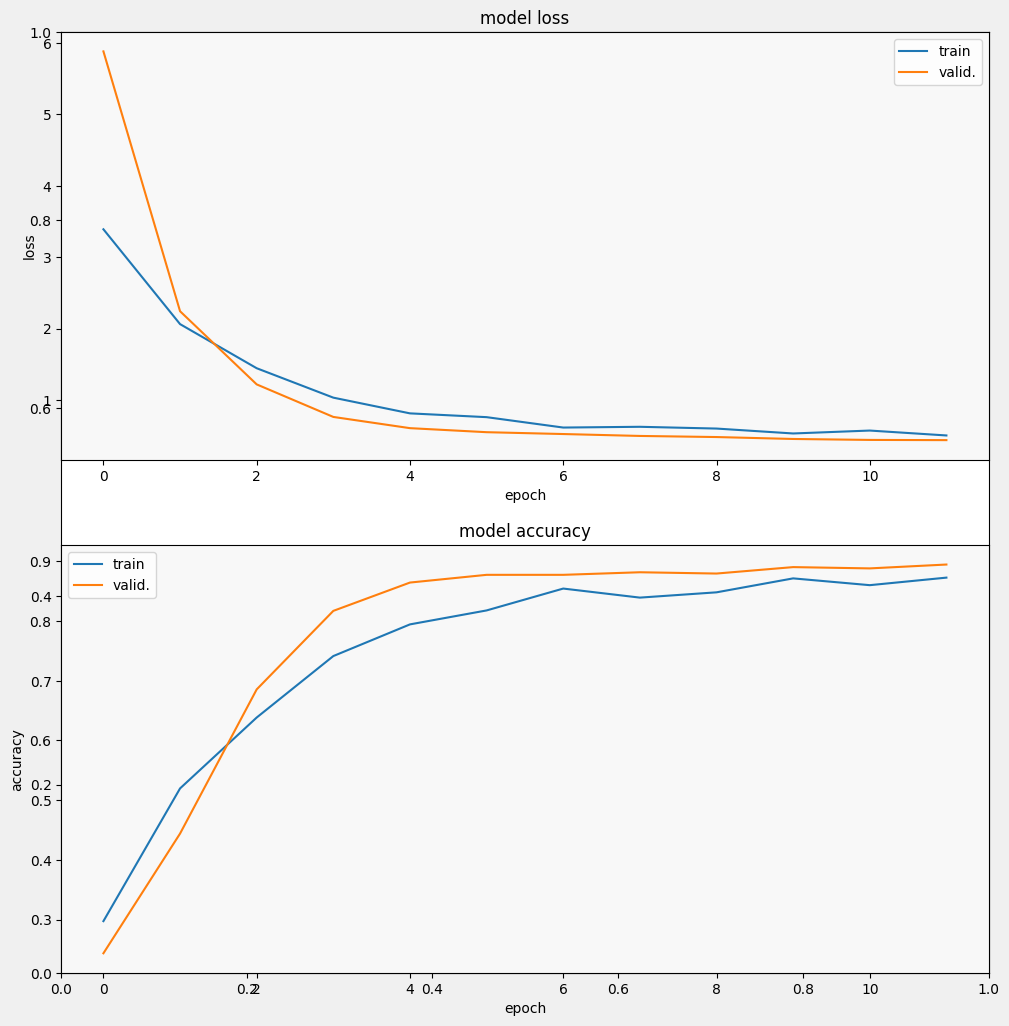

In [28]:
display_training_curves(
    history2.history['loss'],
    history2.history['val_loss'],
    'loss',
    211,
)
display_training_curves(
    history2.history['sparse_categorical_accuracy'],
    history2.history['val_sparse_categorical_accuracy'],
    'accuracy',
    212,
)

# Results and Analysis #

Since this is a competition data set, it makes sense to visualize the model’s predictions on the validation set to aid in model selection. We will utilize two approaches: comparing the two model’s confusion matrices and using visual validation to understand where the predictions might be going awry.

Firstly, defining a couple of training functions to help us make the confusion matrices and visual validation plots.

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

def display_confusion_matrix(cmat, score, precision, recall):
    plt.figure(figsize=(15,15))
    ax = plt.gca()
    ax.matshow(cmat, cmap='Reds')
    ax.set_xticks(range(len(CLASSES)))
    ax.set_xticklabels(CLASSES, fontdict={'fontsize': 7})
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
    ax.set_yticks(range(len(CLASSES)))
    ax.set_yticklabels(CLASSES, fontdict={'fontsize': 7})
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    titlestring = ""
    if score is not None:
        titlestring += 'f1 = {:.3f} '.format(score)
    if precision is not None:
        titlestring += '\nprecision = {:.3f} '.format(precision)
    if recall is not None:
        titlestring += '\nrecall = {:.3f} '.format(recall)
    if len(titlestring) > 0:
        ax.text(101, 1, titlestring, fontdict={'fontsize': 18, 'horizontalalignment':'right', 'verticalalignment':'top', 'color':'#804040'})
    plt.show()
    
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

**Confusion Matrices**

We define the Precision, Recall and F1 Score for the model prior to printing the confusion matrix.

***Model 1***

In [30]:
cmdataset = get_validation_dataset(ordered=True)
images_ds = cmdataset.map(lambda image, label: image)
labels_ds = cmdataset.map(lambda image, label: label).unbatch()

cm_correct_labels = next(iter(labels_ds.batch(NUM_VALIDATION_IMAGES))).numpy()
cm_probabilities = model.predict(images_ds)
cm_predictions = np.argmax(cm_probabilities, axis=-1)

labels = range(len(CLASSES))
cmat = confusion_matrix(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
)
cmat = (cmat.T / cmat.sum(axis=1)).T # normalize

29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step


You might be familiar with metrics like [F1-score](https://en.wikipedia.org/wiki/F1_score) or [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall). This cell will compute these metrics and display them with a plot of the confusion matrix. (These metrics are defined in the Scikit-learn module `sklearn.metrics`; we've imported them in the helper script for you.)

/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


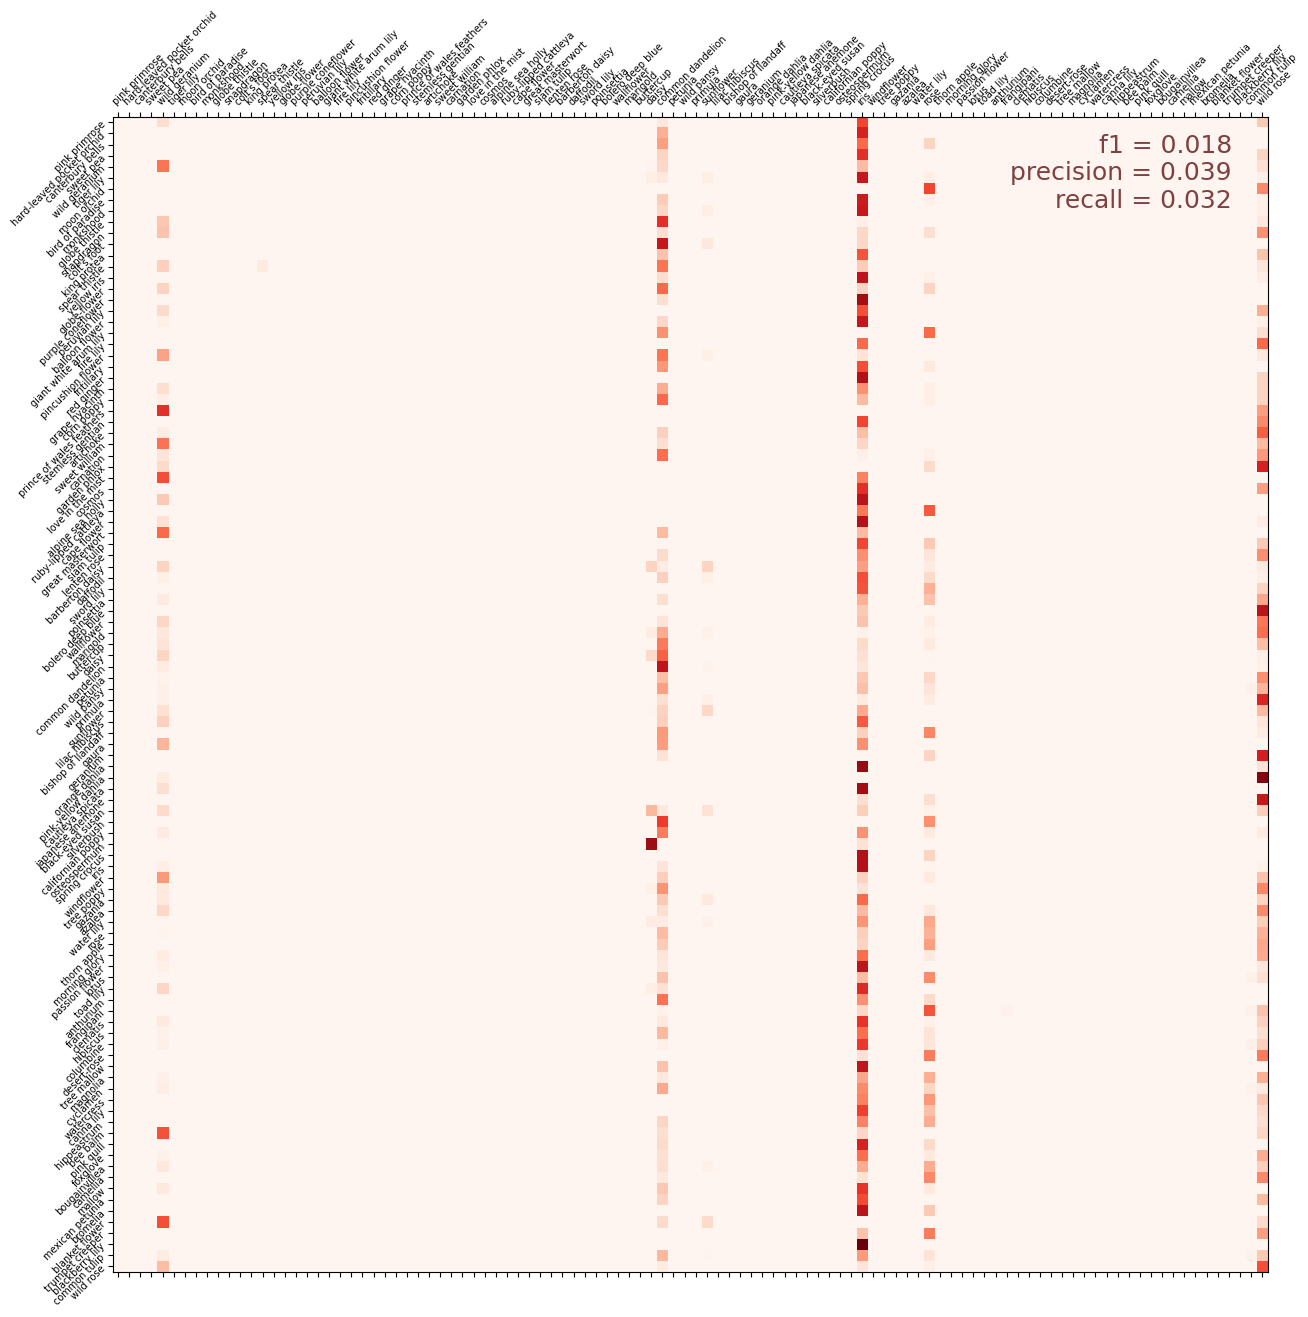

In [31]:
score = f1_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
precision = precision_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
recall = recall_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
display_confusion_matrix(cmat, score, precision, recall)

***Model 2***

2024-06-08 15:41:41.623809: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node sequential_3_1/dense_3_1/Add/ReadVariableOp.
I0000 00:00:1717861301.883009     792 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(860161db2710f2a5:0:0), session_name()


      1/Unknown 12s 12s/step

I0000 00:00:1717861310.107589     792 tpu_compile_op_common.cc:245] Compilation of 860161db2710f2a5:0:0 with session name  took 8.224499898s and succeeded
I0000 00:00:1717861310.119610     792 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(860161db2710f2a5:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_distributed_4231416903528610805", property.function_library_fingerprint = 14548972515953751347, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1717861310.119646     792 tpu_compilation_cache_interface.cc:541] After adding entry for key 860161db271

29/29 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step


/usr/local/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


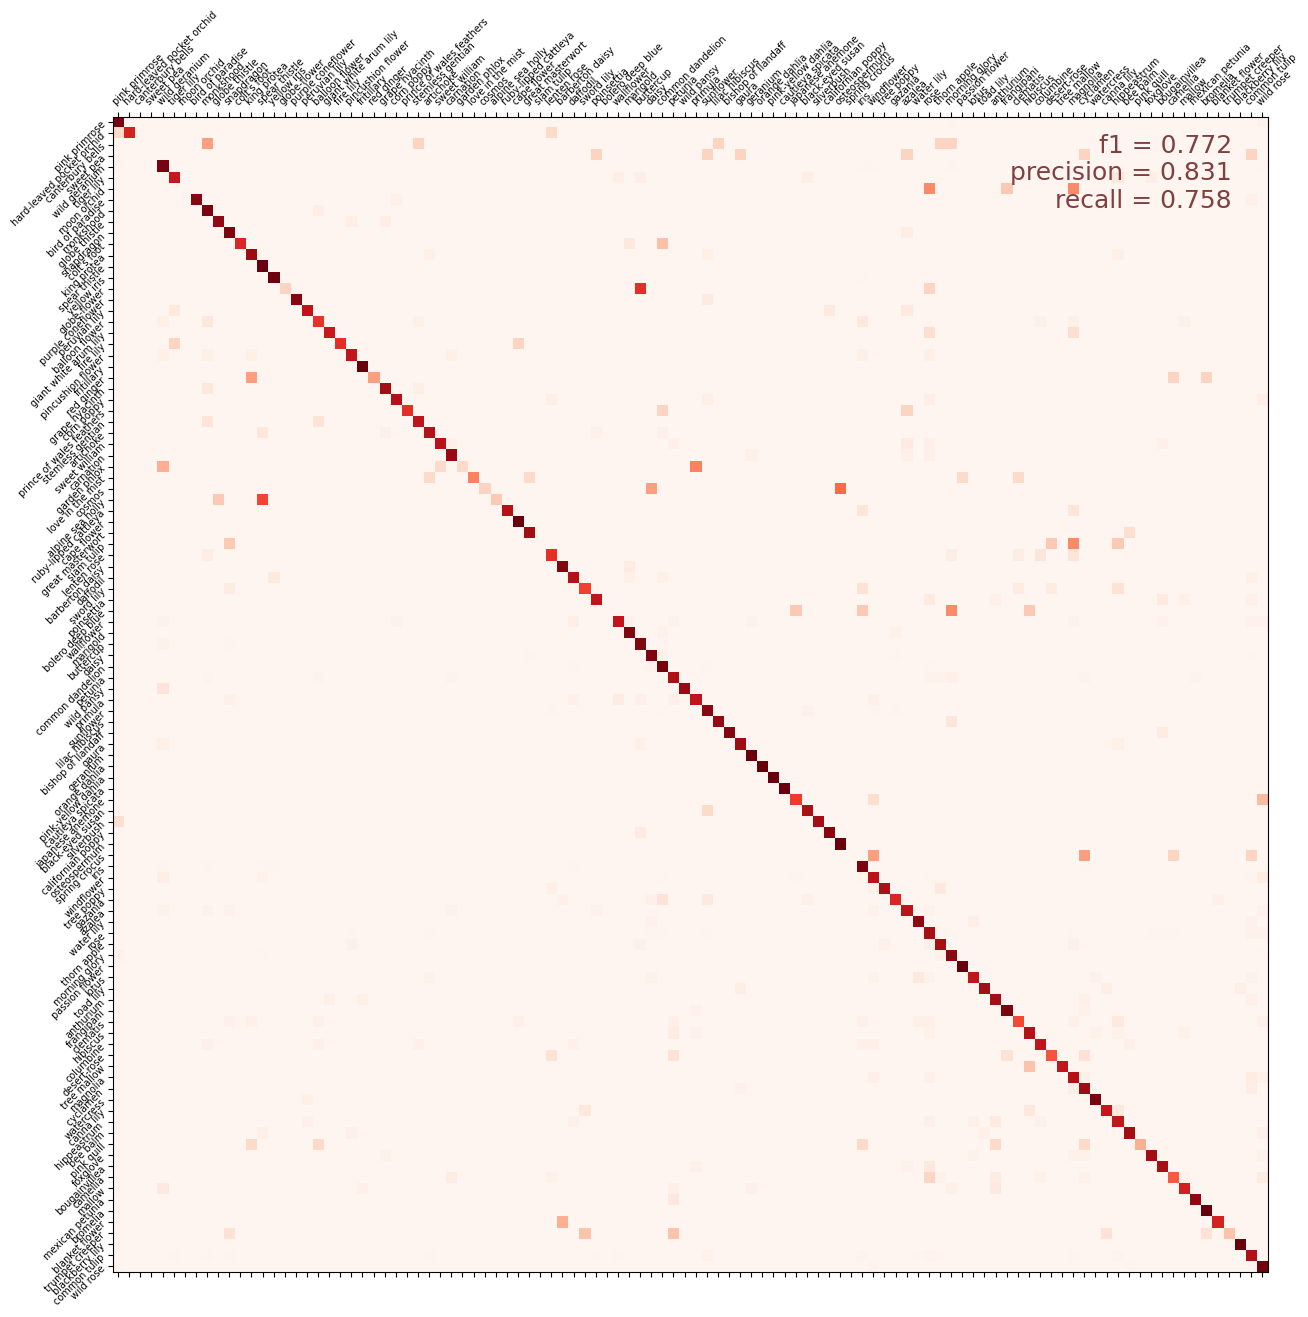

In [32]:
cmdataset = get_validation_dataset(ordered=True)
images_ds = cmdataset.map(lambda image, label: image)
labels_ds = cmdataset.map(lambda image, label: label).unbatch()

cm_correct_labels = next(iter(labels_ds.batch(NUM_VALIDATION_IMAGES))).numpy()
cm_probabilities = model2.predict(images_ds)
cm_predictions = np.argmax(cm_probabilities, axis=-1)

labels = range(len(CLASSES))
cmat = confusion_matrix(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
)
cmat = (cmat.T / cmat.sum(axis=1)).T # normalize

score = f1_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
precision = precision_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
recall = recall_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
display_confusion_matrix(cmat, score, precision, recall)

The confusion matrix for the second model looks a lot more promising. We aren't seeing any particular flowers that the model is having trouble categorizing, and scores for precision, recall and F1 are far higher.

**Visual Validation**

It can also be helpful to look at some examples from the validation set and see what class your model predicted. This can help reveal patterns in the kinds of images your model has trouble with.

This cell will set up the validation set to display 8 images at a time.

In [33]:
dataset = get_validation_dataset()
dataset = dataset.unbatch().batch(8)
batch = iter(dataset)

***Model 1***

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


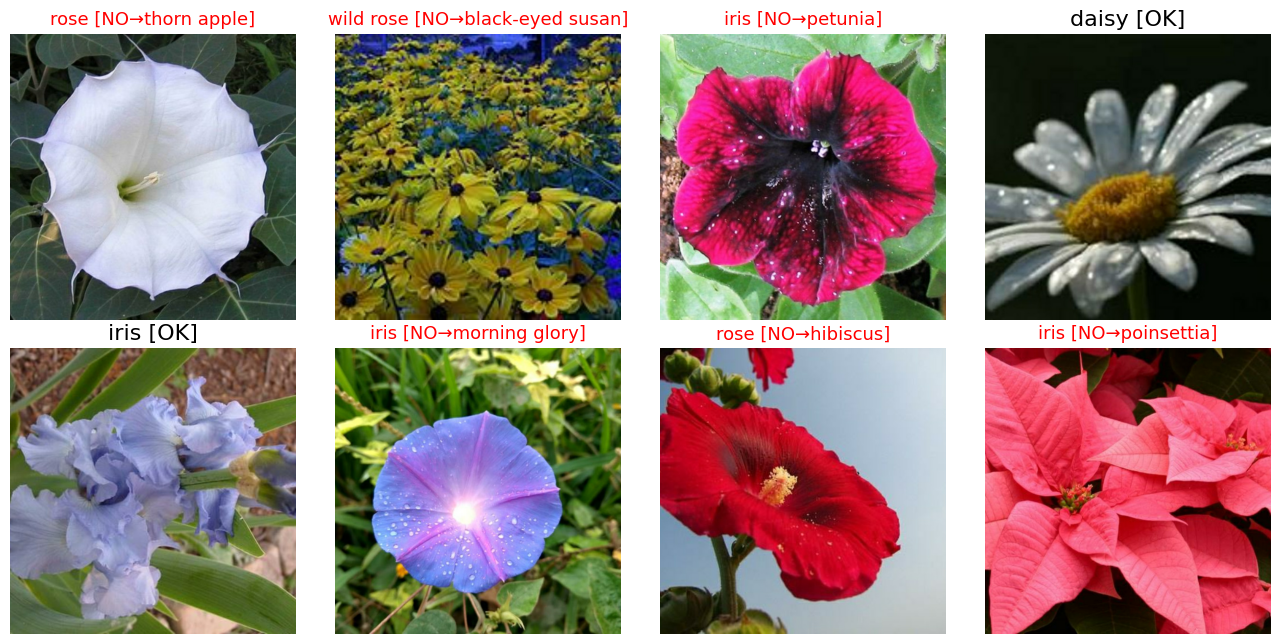

In [34]:
images, labels = next(batch)
probabilities = model.predict(images)
predictions = np.argmax(probabilities, axis=-1)
display_batch_of_images((images, labels), predictions)

***Model 2***

2024-06-08 15:42:51.249350: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node sequential_3_1/dense_3_1/Add/ReadVariableOp.
I0000 00:00:1717861371.545457     816 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(6080d9393872da20:0:0), session_name()


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


I0000 00:00:1717861376.677337     816 tpu_compile_op_common.cc:245] Compilation of 6080d9393872da20:0:0 with session name  took 5.131821396s and succeeded
I0000 00:00:1717861376.687884     816 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(6080d9393872da20:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_data_distributed_7878351914287456280", property.function_library_fingerprint = 4852906758116874514, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "2,512,512,3,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1717861376.687916     816 tpu_compilation_cache_interface.cc:541] After adding entry for key

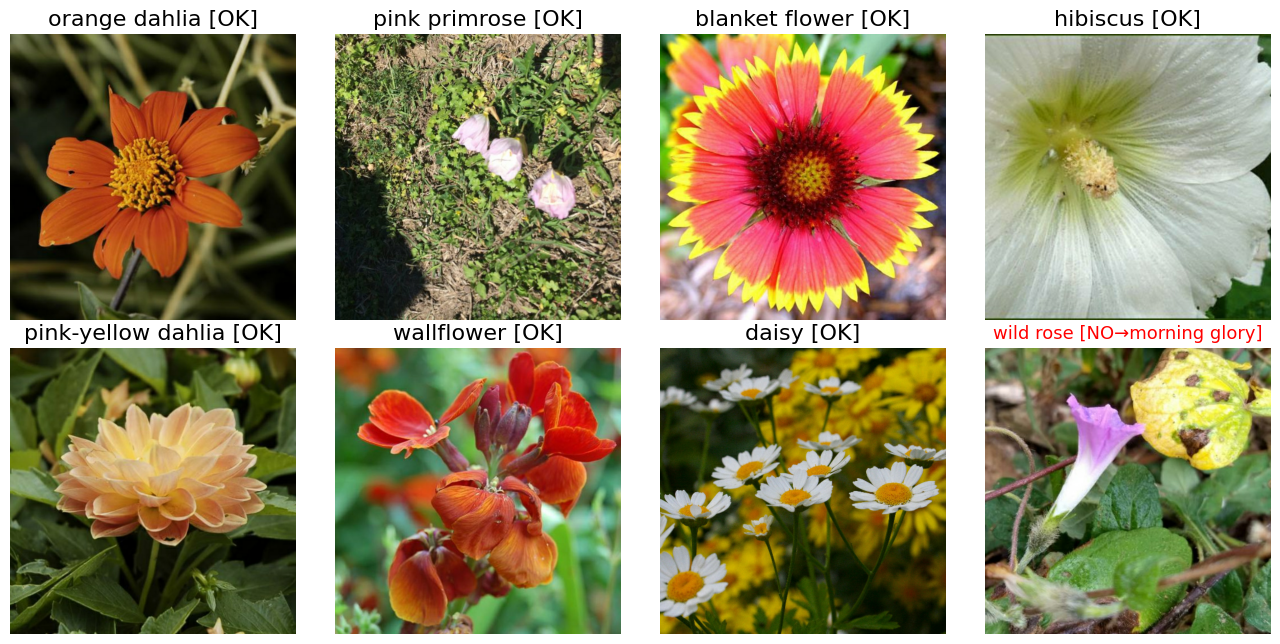

In [35]:
images, labels = next(batch)
probabilities = model2.predict(images)
predictions = np.argmax(probabilities, axis=-1)
display_batch_of_images((images, labels), predictions)

Visual validation gives us a sense of the far likelier correct identification by the second model. It seems like in spots it has some confusion between species but it is not always miscategorizing certain species as the first model does.

# Discussion and Conclusion #

Discussion of learning and takeaways: This project was an excellent way to get used to using TPUs for machine learning models in order to increase efficiency and decrease the cost (time) of model training. After preparing the data pipelines and changing the data into a format that is best suited for the pipelines, I created two models with differing underlying pretrained models to understand the effect of pretrained models on a computer vision tasks.

The use of the Xception application far outperformed the VGG19 application. We can see the increase in performance by the higher accuracy convergence for the validation training set, the better precision, recall and F1 scores from the confusion matrix, and even by visual validation.

The Xception algorithm is known for improved feature extraction over VGG19. While VGG19 uses a deeper neural network structure and if good for capturing higher level features, Xception is more capable of detecting differences in fine-grained detail within an image. It makes sense that it would be more suited to imagery of flowers, since the finer details are where the categorization really takes place.

Discussion of why this may or may not work for this application: This computer vision application is fantastic for flower categorization and would probably work even in an app-based environment if you are able to offer a good computing environment to your user.

Suggestions to Improve: 


**Appendix - Sources**

https://www.kaggle.com/c/tpu-getting-started/overview

https://www.kaggle.com/code/ryanholbrook/create-your-first-submission

https://www.kaggle.com/docs/tpu

https://keras.io/api/applications/vgg/

https://keras.io/api/applications/xception/

https://medium.com/analytics-vidhya/learning-rate-decay-and-methods-in-deep-learning-2cee564f910b

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10651454/#:~:text=Because%20of%20the%20improved%20feature,extracting%20higher%2Dlevel%20abstract%20features.
